In [1]:
#now we will import start to visualize the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import the Plotly Express library for creating interactive plots
import plotly.express as px  
# Import the Plotly library for creating the plots
import plotly.graph_objects as go

In [2]:
df_2 = pd.read_csv('../data/processed/Steam_2024_bestRevenue_1500_02.csv')
df_2

,game,release_date,copies_sold,price,revenue,avg_playtime,review_score,publisher_class,publisher,developers,steam_id,total_revenue,revenue_percentage,days_in_market,average_price_per_hour
0,WWE 2K24,2024-03-07,165301,99.99,8055097.0,42.4,71,AAA,2K,Visual Concepts,2315690,18878021.0,42.67,186,2.36
1,EARTH DEFENSE FORCE 6,2024-07-25,159806,59.99,7882151.0,29.7,57,Indie,D3PUBLISHER,SANDLOT,2291060,7945034.0,99.21,46,2.02
2,Sins of a Solar Empire II,2024-08-15,214192,49.99,7815247.0,12.5,88,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment",1575940,7922689.0,98.64,25,4.00
3,Legend of Mortal,2024-06-14,440998,19.99,7756399.0,24.8,76,Indie,"Paras Games,Obb Studio Inc.",Obb Studio Inc.,1859910,7756399.0,100.00,87,0.81
4,Shin Megami Tensei V: Vengeance,2024-06-13,141306,59.99,7629252.0,34.3,96,AA,SEGA,ATLUS,1875830,63528353.0,12.01,88,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,Infection Free Zone,2024-04-11,452146,24.99,8739530.0,14.5,73,Indie,Games Operators,Jutsu Games,1465460,8739530.0,100.00,151,1.72
1496,Dark and Darker,2024-06-07,2640903,0.00,8706135.0,32.0,74,Indie,IRONMACE,IRONMACE,2016590,8706135.0,100.00,94,0.00
1497,Songs of Conquest,2024-05-20,501474,34.99,8641459.0,11.9,88,AA,Coffee Stain Publishing,Lavapotion,867210,13947324.0,61.96,112,2.94
1498,GUNDAM BREAKER 4,2024-08-28,156339,59.99,8440898.0,14.7,81,AA,Bandai Namco Entertainment Inc.,"CRAFTS ＆ MEISTER Co., Ltd",1672500,12486291.0,67.60,12,4.08


**From here we will Identify and Plot graphs for top 10 publishers by revenue**

In [3]:
#lets identify top 10 publishers by total_revenue 

top_10_publisher = df_2.groupby('publisher')['total_revenue'].sum().sort_values(ascending=False).head(10)

In [4]:
#we are now creating a new dataframe with only the top 10 publishers and their games

#Calculate total revenue for each publisher
total_revenue_by_publisher = df_2.groupby('publisher')['total_revenue'].sum().reset_index()

#Identify the top 10 publishers based on total revenue
top_10_publishers = total_revenue_by_publisher.sort_values(by='total_revenue', ascending=False).head(10)

#Filter the original DataFrame to include only games by the top 10 publishers
df_10_publisher_games = df_2[df_2['publisher'].isin(top_10_publishers['publisher'])]

df_10_publisher_games


,game,release_date,copies_sold,price,revenue,avg_playtime,review_score,publisher_class,publisher,developers,steam_id,total_revenue,revenue_percentage,days_in_market,average_price_per_hour
4,Shin Megami Tensei V: Vengeance,2024-06-13,141306,59.99,7629252.0,34.3,96,AA,SEGA,ATLUS,1875830,63528353.0,12.01,88,1.75
16,Winter Memories,2024-01-05,424281,19.99,5478333.0,9.0,0,Indie,Kagura Games,Dojin Otome,2495450,8701350.0,62.96,248,2.22
33,Norland,2024-07-18,170621,29.99,3991591.0,18.5,79,AA,Hooded Horse,Long Jaunt,1857090,78487195.0,5.09,53,1.62
38,Apollo Justice: Ace Attorney Trilogy,2024-01-24,89327,49.99,3465018.0,40.0,93,AAA,"CAPCOM Co., Ltd.","CAPCOM Co., Ltd.",2187220,117881025.0,2.94,229,1.25
48,EA SPORTS™ Madden NFL 25,2024-08-15,50521,69.99,3182368.0,16.1,50,AAA,Electronic Arts,Tiburon,2582560,21635263.0,14.71,25,4.35
150,Sheryl ~The Alchemist of the Island Ruins~,2024-04-19,13210,17.99,179743.0,5.9,85,Indie,Kagura Games,Pakkuri Paradise,2787300,8701350.0,2.07,143,3.05
155,Baten Kaitos I & II HD Remaster,2024-06-17,4662,49.99,178950.0,13.2,84,AAA,Bandai Namco Entertainment,"logicalbeat Co., Ltd.",2146170,45552937.0,0.39,84,3.79
184,Himegashima Island,2024-08-02,14305,14.99,163296.0,6.4,75,Indie,Kagura Games,Fushidaratei,2991400,8701350.0,1.88,38,2.34
225,And the Hero Was Never Seen Again,2024-02-10,11972,14.99,137489.0,7.0,90,Indie,Kagura Games,Circle Poison,2582660,8701350.0,1.58,212,2.14
253,Dungeon Keeper™ 2,2024-03-07,58372,4.99,124273.0,10.7,96,AAA,Electronic Arts,Bullfrog Productions,2616460,21635263.0,0.57,186,0.47


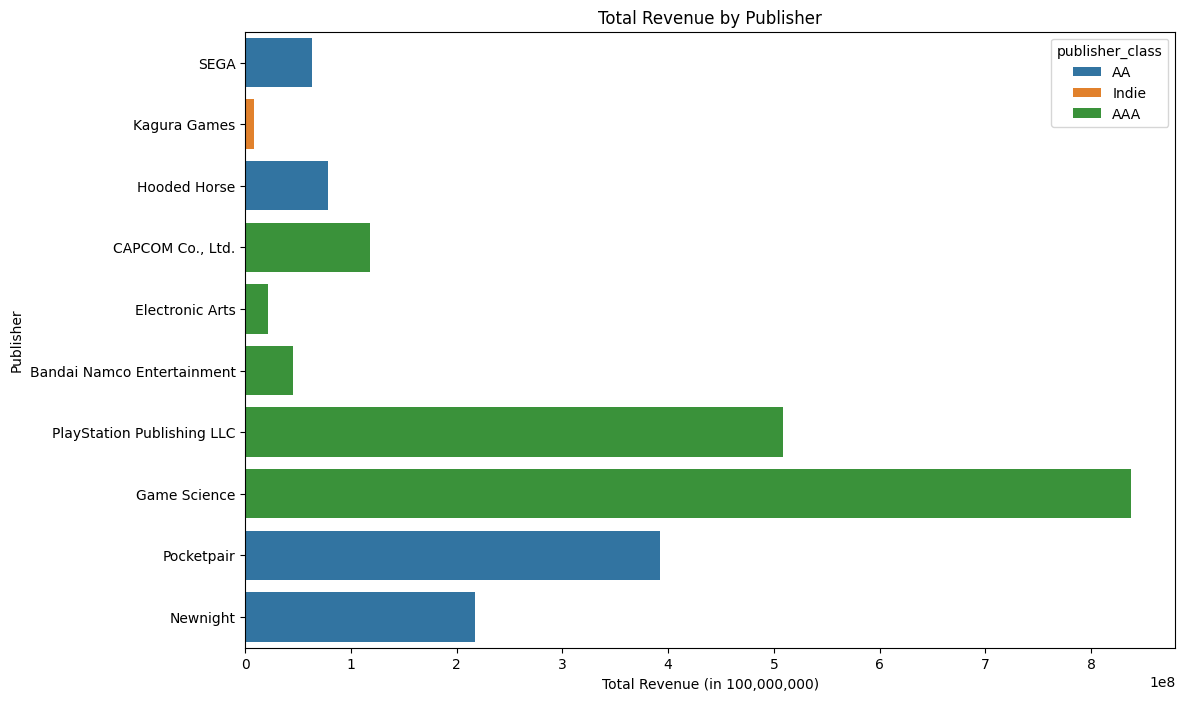

In [5]:
#now lets create a bar plot by total revenue for each publisher and what publisher_class they belong to
#and also convert 1e8 to 100,000,000

plt.figure(figsize=(12, 8))
sns.barplot(data=df_10_publisher_games, x='total_revenue', y='publisher', hue='publisher_class')
plt.xlabel('Total Revenue (in 100,000,000)')
plt.ylabel('Publisher')
plt.title('Total Revenue by Publisher')
plt.savefig('../visuals/initial visuals/total_revenue_by_publisher.png')
plt.show()

#now lets save these plots as images to visuals - initial visuals folder




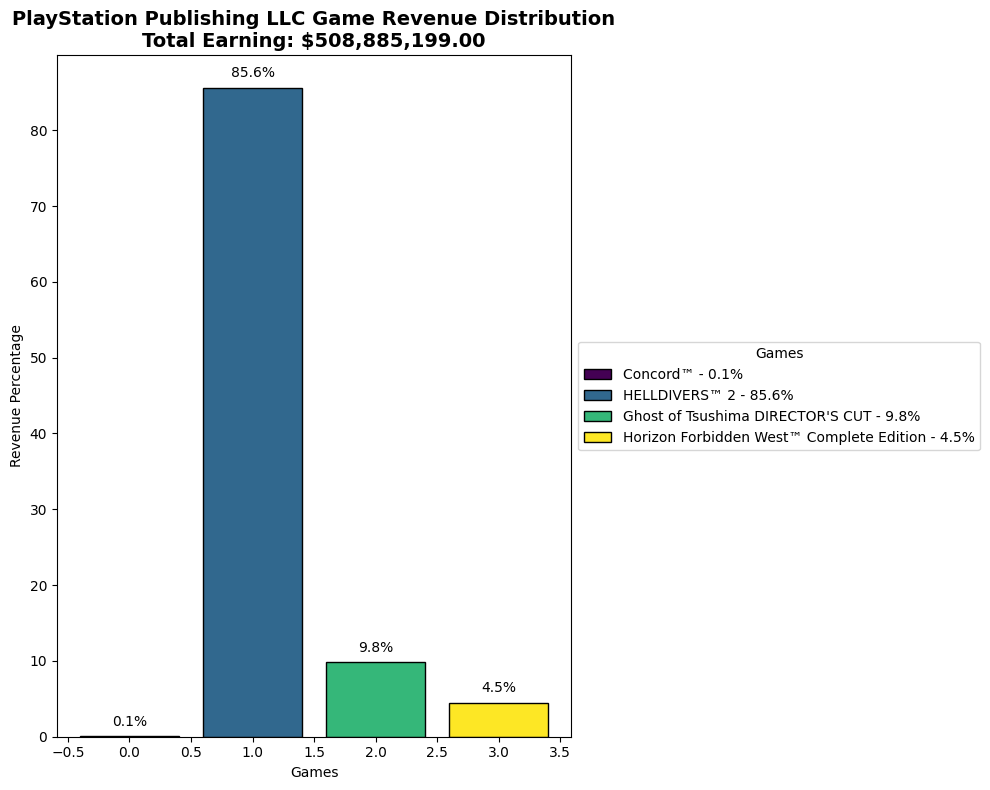

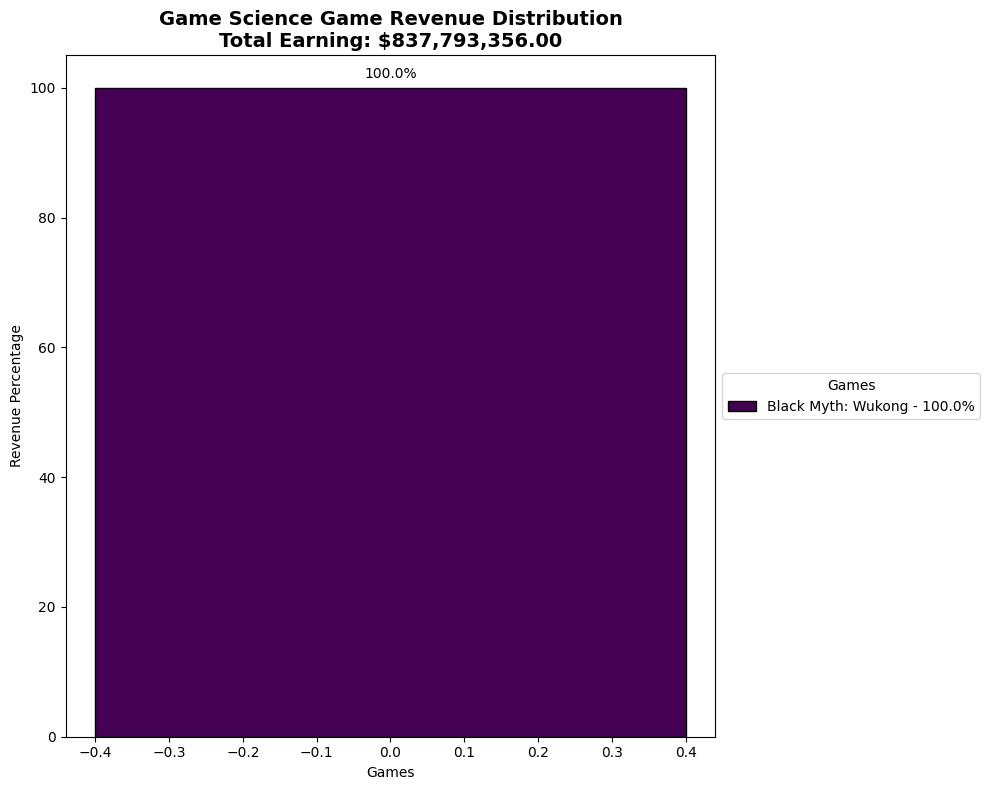

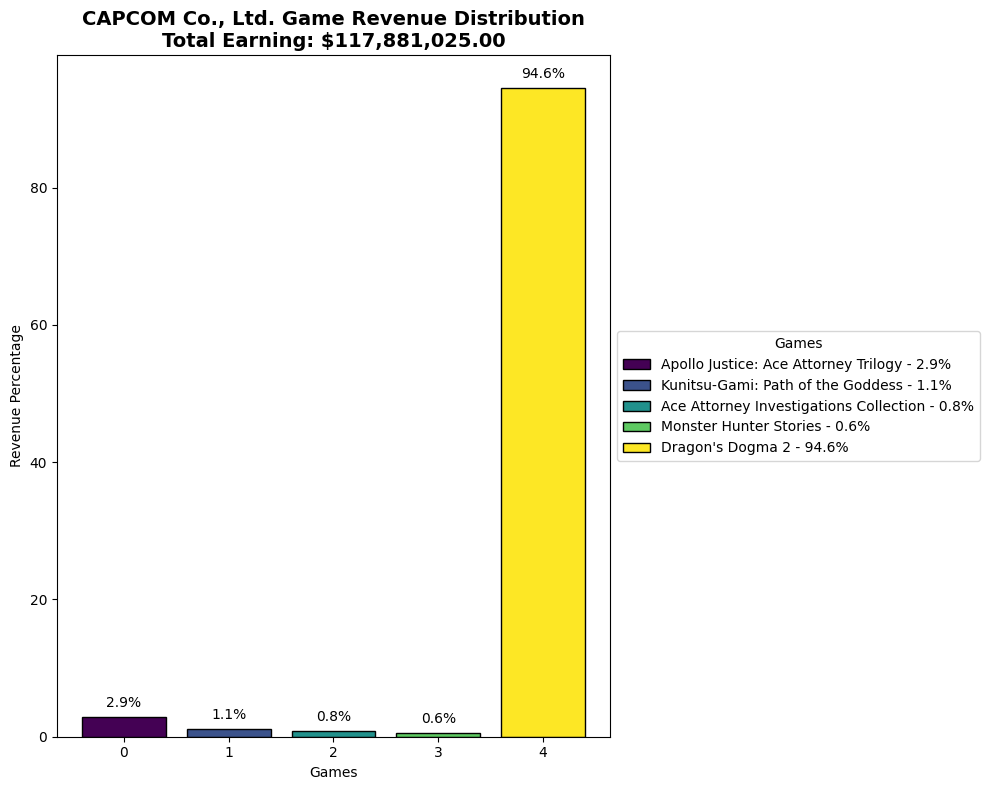

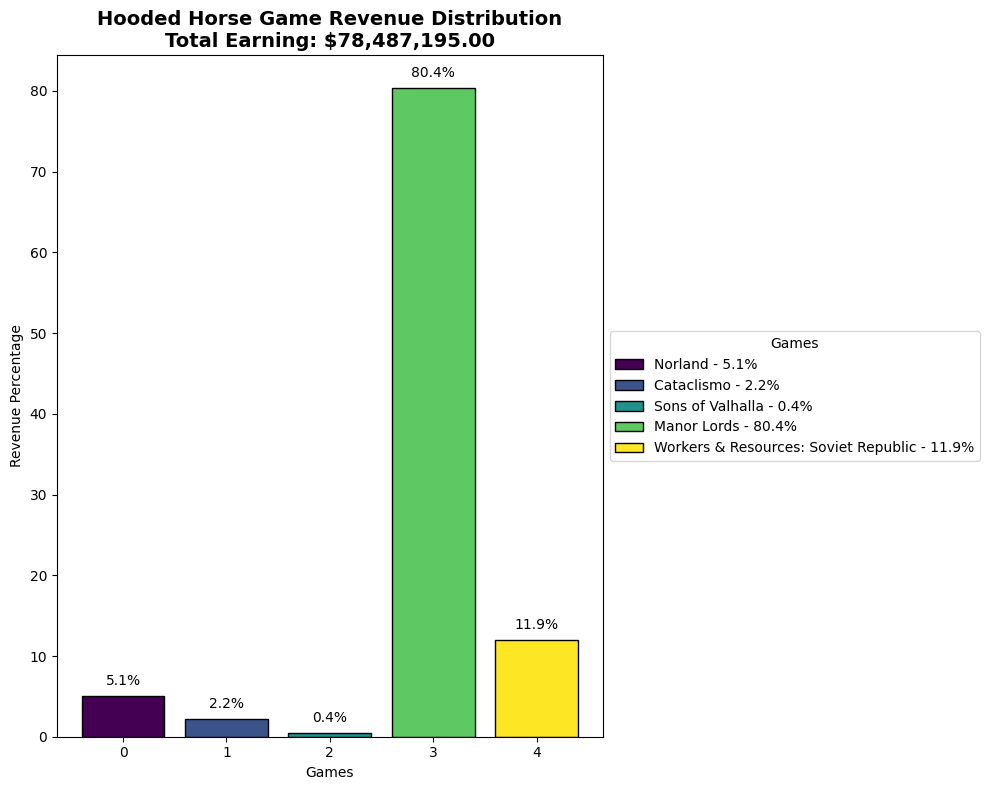

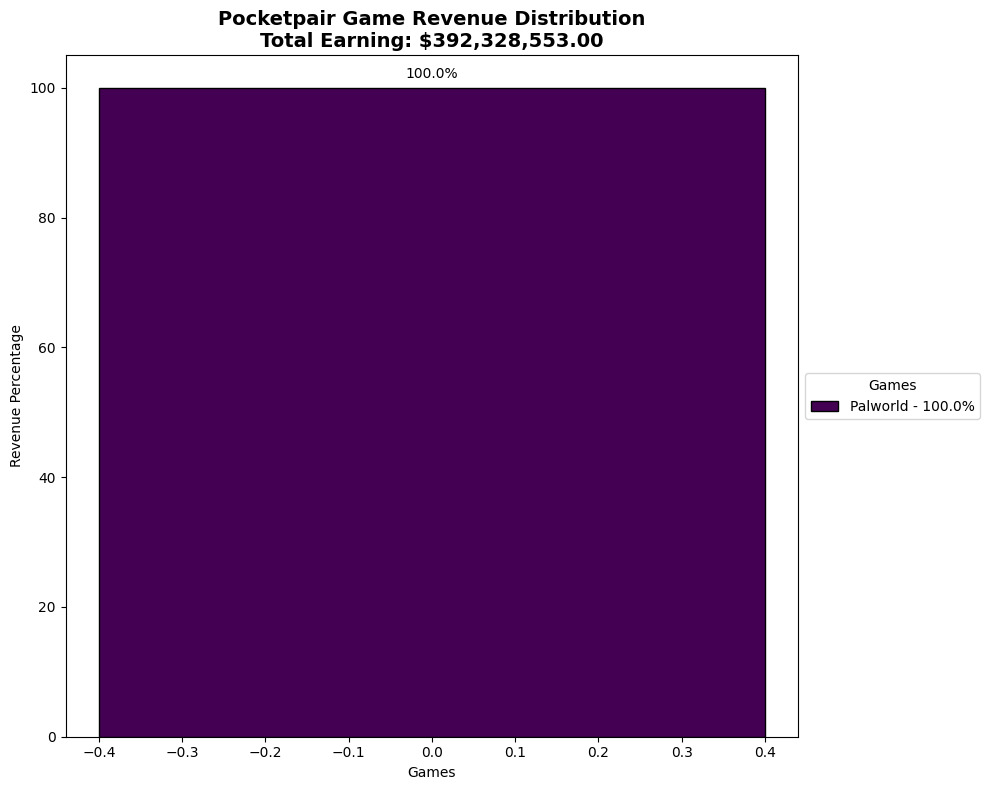

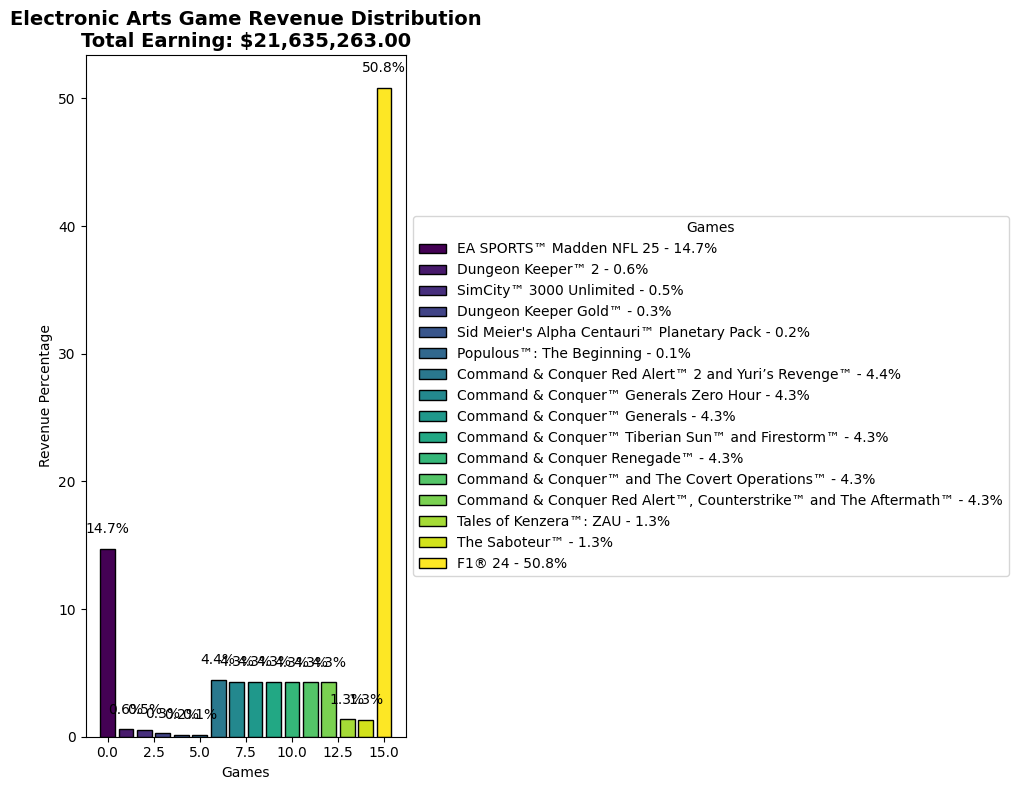

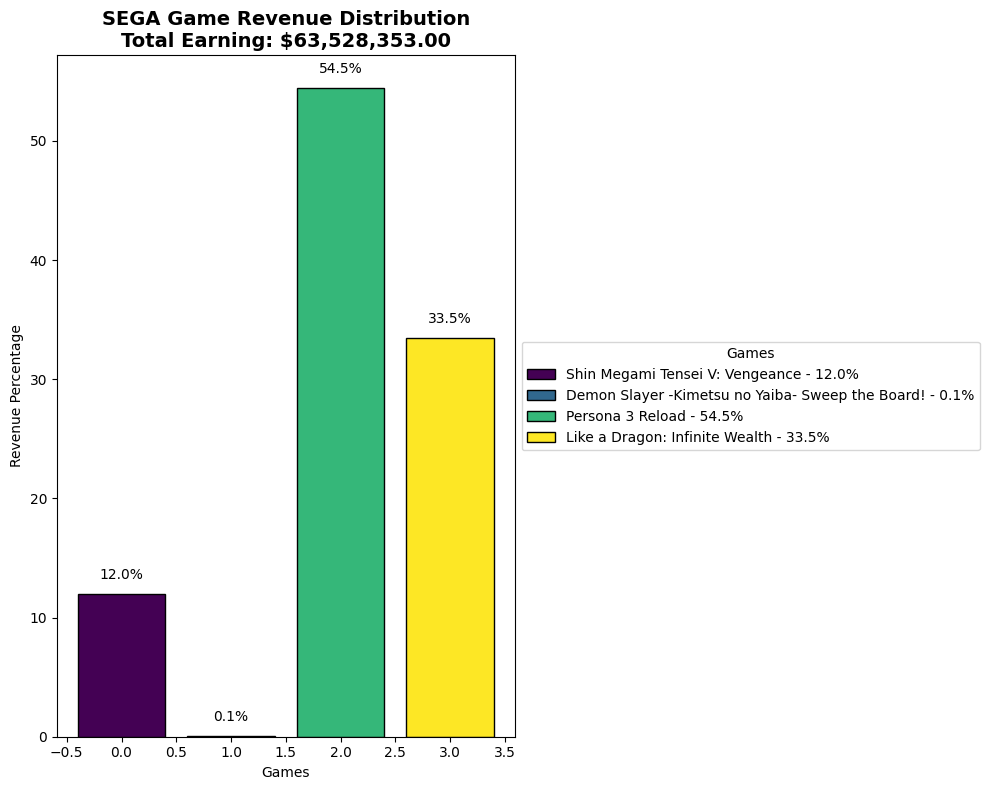

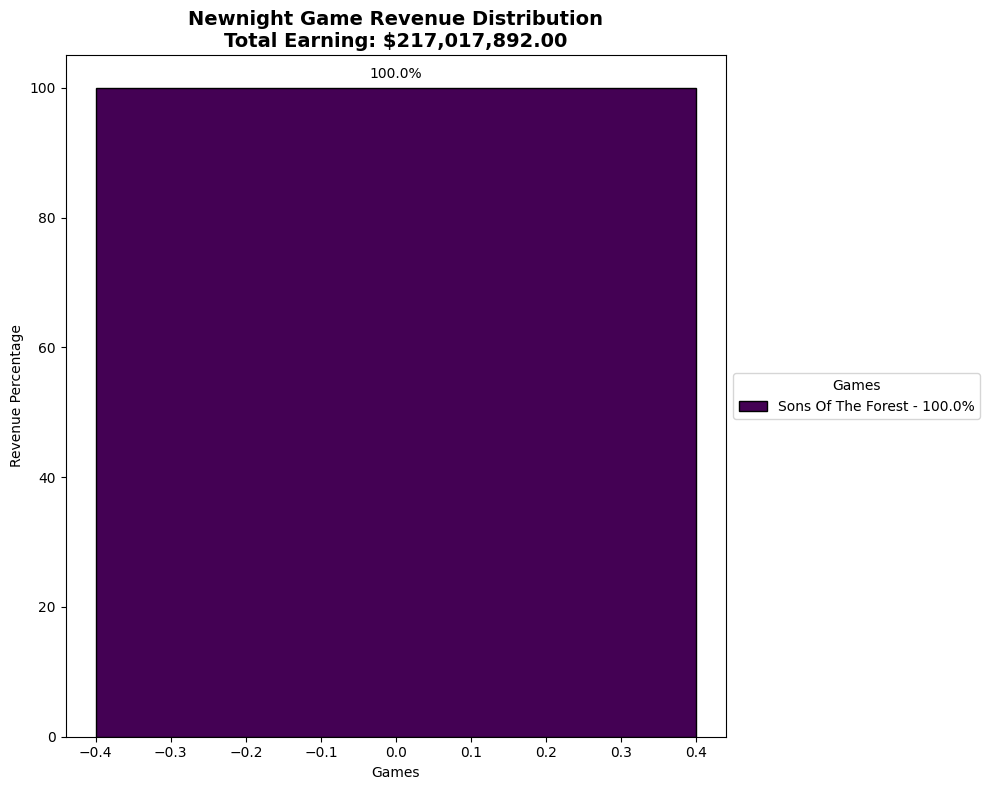

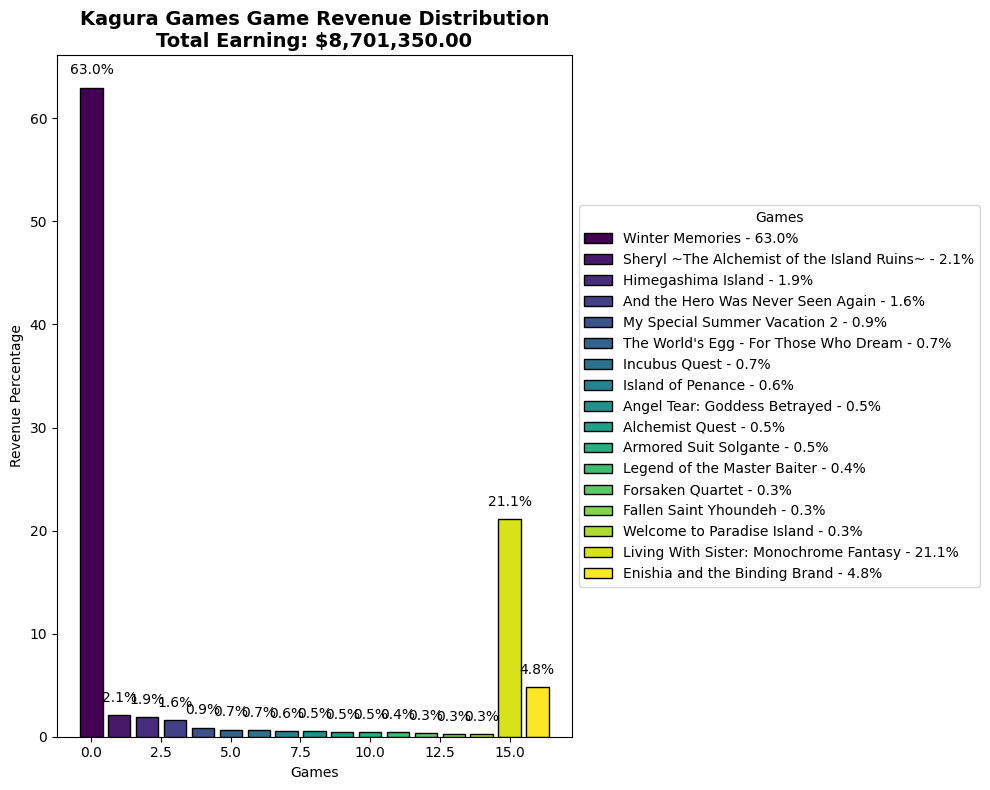

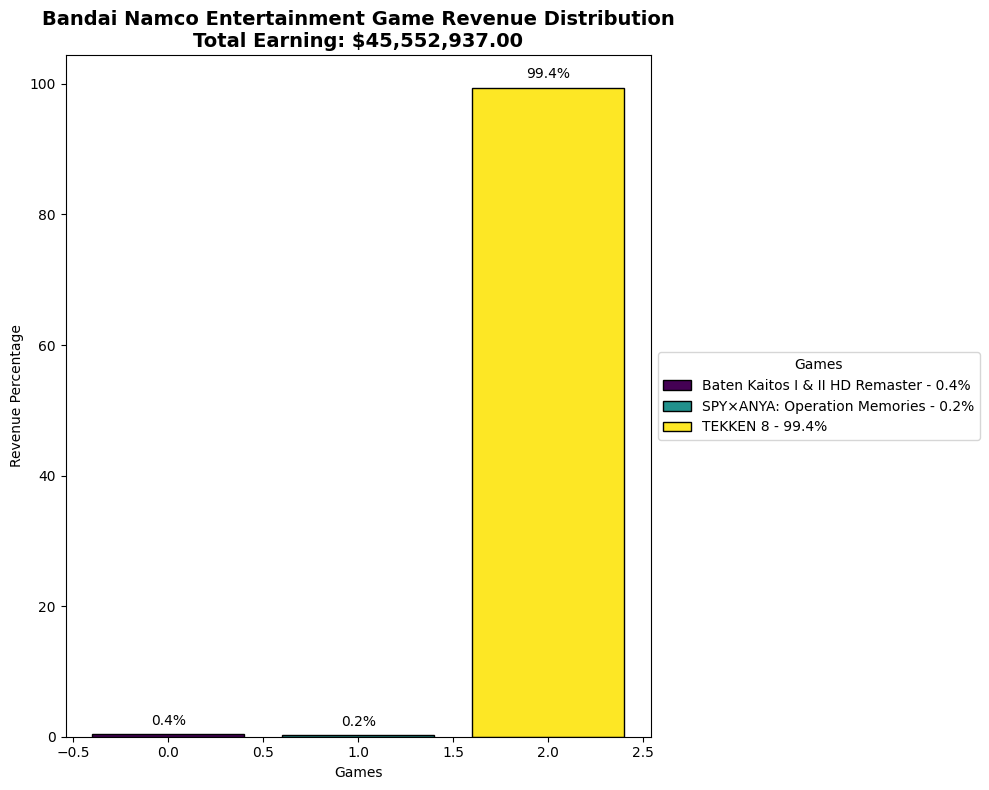

In [6]:
#lets create a loop to visualize top 10 publishers with a pie chard that contains their each game revenue



# Loop through each publisher in the top 10
for i, publisher in enumerate(top_10_publishers['publisher'], 1):
    # Filter the DataFrame for the current publisher's games
    publisher_games = df_10_publisher_games[df_10_publisher_games['publisher'] == publisher]

    # Calculate percentage for each game
    revenue_percentage = publisher_games['revenue'] / publisher_games['revenue'].sum() * 100
    labels_with_percentage = [f"{game} - {percent:.1f}%" for game, percent in zip(publisher_games['game'], revenue_percentage)]

    # Create a figure for each bar plot
    plt.figure(figsize=(10, 8))  # Set the figure size

    # Create a bar plot
    bars = plt.bar(
        range(len(publisher_games)),
        revenue_percentage,
        color=plt.cm.viridis(np.linspace(0, 1, len(publisher_games))),  # Color gradient for bars
        edgecolor='black'
    )

    # Add percentage text below each bar
    for bar, percent in zip(bars, revenue_percentage):
        plt.text(
            bar.get_x() + bar.get_width() / 2,  # x position
            bar.get_height() + 1,  # y position slightly above the bar
            f'{percent:.1f}%',  # percentage text
            ha='center', va='bottom', fontsize=10
        )

    # Add legend to the right side
    plt.legend(
        bars,
        labels_with_percentage,
        title="Games",
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        fontsize=10
    )

    # Add title and labels
    total_earning = publisher_games['revenue'].sum()
    plt.title(f'{publisher} Game Revenue Distribution\nTotal Earning: ${total_earning:,.2f}', fontsize=14, fontweight='bold')
    plt.xlabel('Games')
    plt.ylabel('Revenue Percentage')

    # Display the plot
    plt.tight_layout()  # Adjust layout to make room for the legend
    # Save the plot as an image to ('../visuals/initial visuals')
    
    plt.savefig(f'../visuals/initial visuals/{i}_{publisher}_game_revenue_distribution.png')
        
    plt.show()




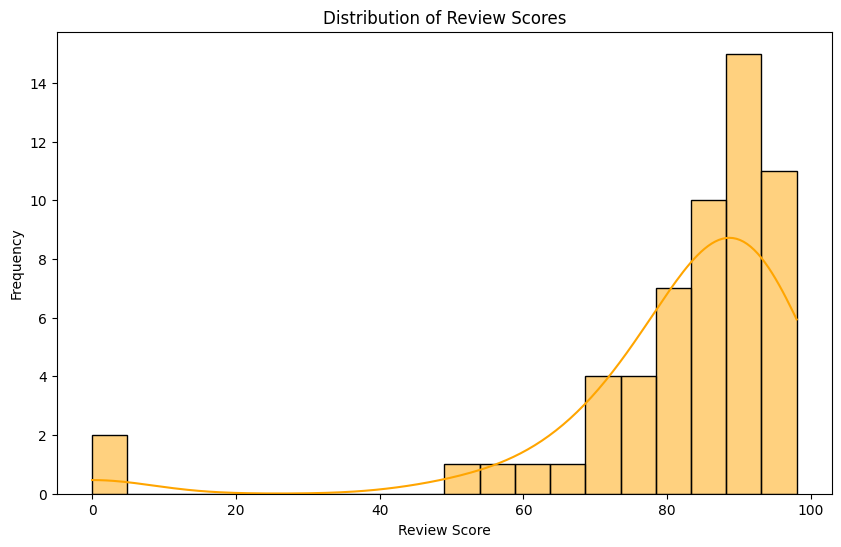

In [7]:
#A distribution plot (histogram) to show the overall distribution of review scores.
#Provides a sense of the most common review scores and the spread across all games by the top 10 publishers.

plt.figure(figsize=(10, 6))
sns.histplot(df_10_publisher_games['review_score'], bins=20, kde=True, color='orange')
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.savefig('../visuals/initial visuals/distribution_of_review_scores.png')
plt.show()


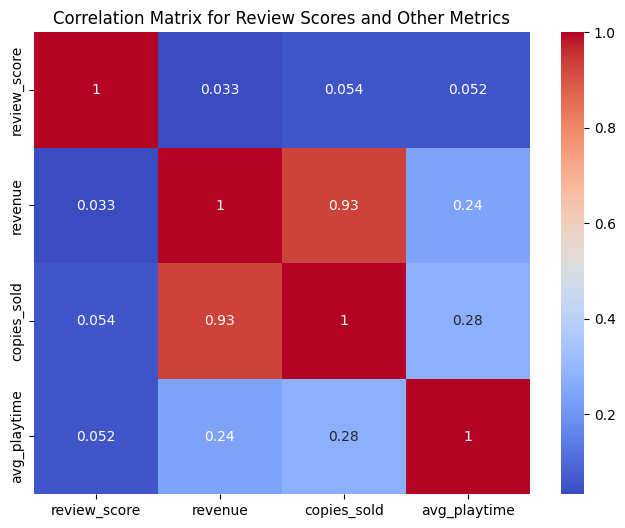

In [8]:
#A heatmap showing correlations between review scores and other numerical metrics (e.g., revenue, copies sold, average playtime).
#Visualizes the relationships between different variables and helps understand which factors most closely relate to review scores.

corr_matrix = df_10_publisher_games[['review_score', 'revenue', 'copies_sold', 'avg_playtime']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Review Scores and Other Metrics')
plt.savefig('../visuals/initial visuals/correlation_matrix.png')
plt.show()


C:\Users\alice\AppData\Local\Temp\ipykernel_16076\3216465552.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='publisher', y='review_score', data=df_10_publisher_games, palette='Set2')


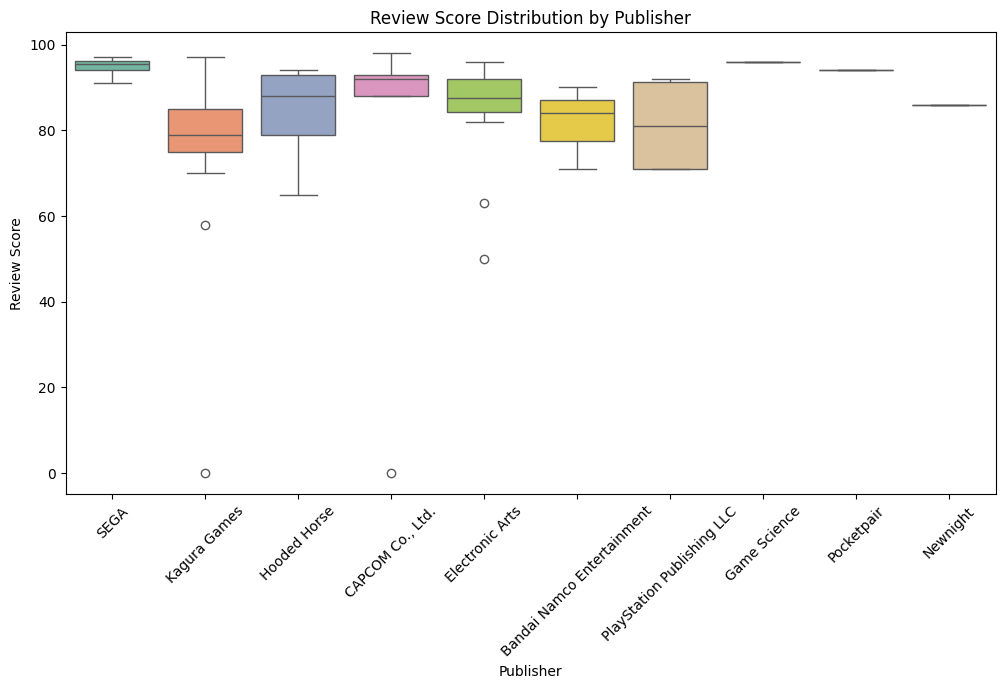

In [9]:
#Display the distribution of review scores for each publisher.
#Helps identify the spread, median, and any outliers in the review scores across different publishers.

plt.figure(figsize=(12, 6))
sns.boxplot(x='publisher', y='review_score', data=df_10_publisher_games, palette='Set2')
plt.xticks(rotation=45)
plt.title('Review Score Distribution by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Review Score')
plt.savefig('../visuals/initial visuals/review_score_distribution_by_publisher.png')
plt.show()


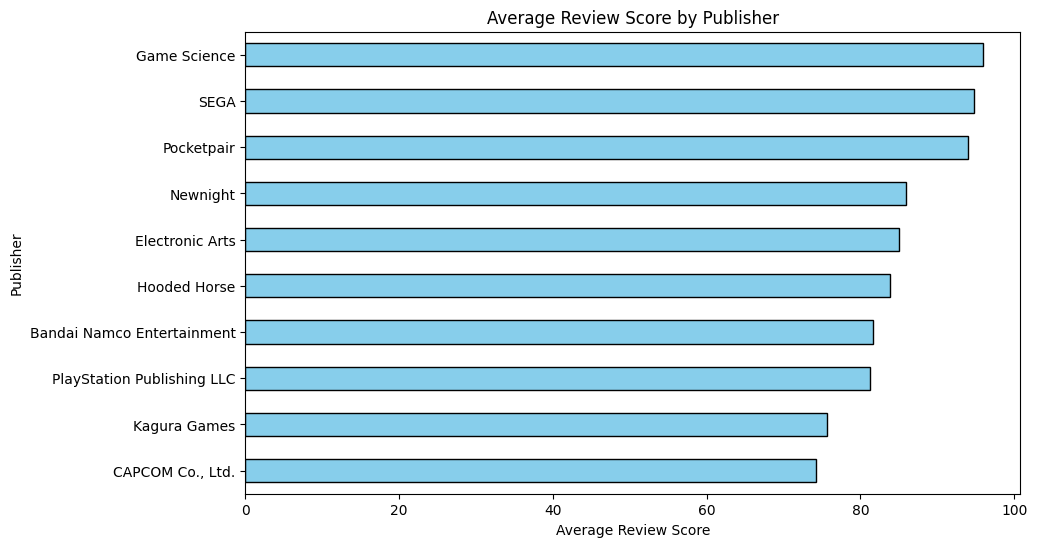

In [10]:
# Calculate average review score for each publisher
avg_review_scores = df_10_publisher_games.groupby('publisher')['review_score'].mean().sort_values()

# Plot bar chart
plt.figure(figsize=(10, 6))
avg_review_scores.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Average Review Score by Publisher')
plt.xlabel('Average Review Score')
plt.ylabel('Publisher')
plt.savefig('../visuals/initial visuals/average_review_score_by_publisher.png')
plt.show()


C:\Users\alice\AppData\Local\Temp\ipykernel_16076\3471257033.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='publisher_class', y='review_score', data=df_10_publisher_games, palette='pastel')


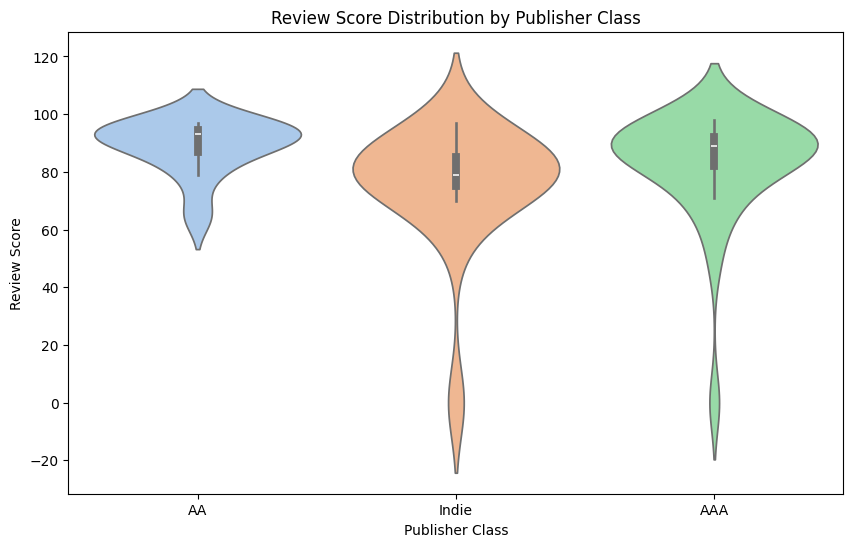

In [11]:
#A violin plot showing the distribution of review scores based on the publisher class (e.g., "AAA", "Indie").
#Highlights how review scores vary for different types of publishers.

plt.figure(figsize=(10, 6))
sns.violinplot(x='publisher_class', y='review_score', data=df_10_publisher_games, palette='pastel')
plt.title('Review Score Distribution by Publisher Class')
plt.xlabel('Publisher Class')
plt.ylabel('Review Score')
plt.savefig('../visuals/initial visuals/review_score_distribution_by_publisher_class.png')
plt.show()


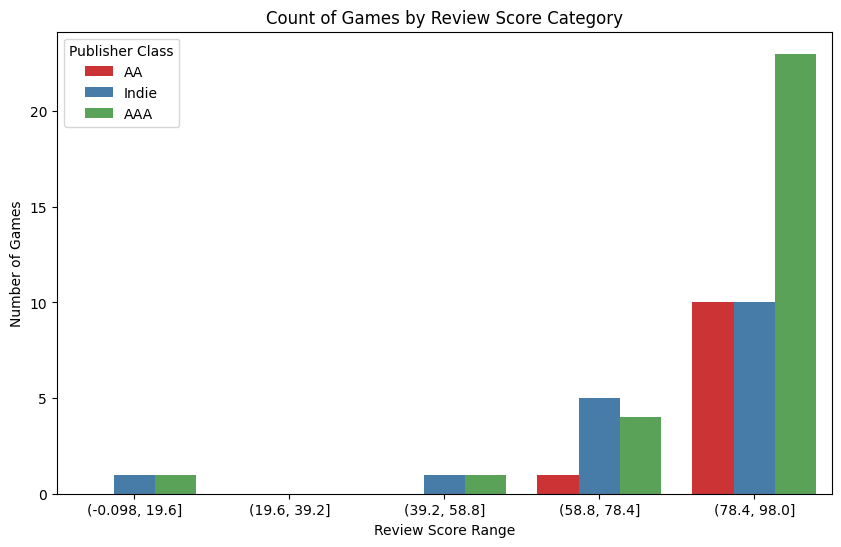

In [12]:
#A count plot showing the number of games by review score categories.
#Identifies which review score ranges are most common among the top 10 publishers.

plt.figure(figsize=(10, 6))
sns.countplot(x=pd.cut(df_10_publisher_games['review_score'], bins=5), data=df_10_publisher_games, palette='Set1', hue='publisher_class')
plt.legend(title='Publisher Class', loc='upper left')
plt.title('Count of Games by Review Score Category')
plt.xlabel('Review Score Range')
plt.ylabel('Number of Games')
plt.savefig('../visuals/initial visuals/count_of_games_by_review_score_category.png')
plt.show()


In [13]:
df_10_publisher_games.head()

,game,release_date,copies_sold,price,revenue,avg_playtime,review_score,publisher_class,publisher,developers,steam_id,total_revenue,revenue_percentage,days_in_market,average_price_per_hour
4,Shin Megami Tensei V: Vengeance,2024-06-13,141306,59.99,7629252.0,34.3,96,AA,SEGA,ATLUS,1875830,63528353.0,12.01,88,1.75
16,Winter Memories,2024-01-05,424281,19.99,5478333.0,9.0,0,Indie,Kagura Games,Dojin Otome,2495450,8701350.0,62.96,248,2.22
33,Norland,2024-07-18,170621,29.99,3991591.0,18.5,79,AA,Hooded Horse,Long Jaunt,1857090,78487195.0,5.09,53,1.62
38,Apollo Justice: Ace Attorney Trilogy,2024-01-24,89327,49.99,3465018.0,40.0,93,AAA,"CAPCOM Co., Ltd.","CAPCOM Co., Ltd.",2187220,117881025.0,2.94,229,1.25
48,EA SPORTS™ Madden NFL 25,2024-08-15,50521,69.99,3182368.0,16.1,50,AAA,Electronic Arts,Tiburon,2582560,21635263.0,14.71,25,4.35


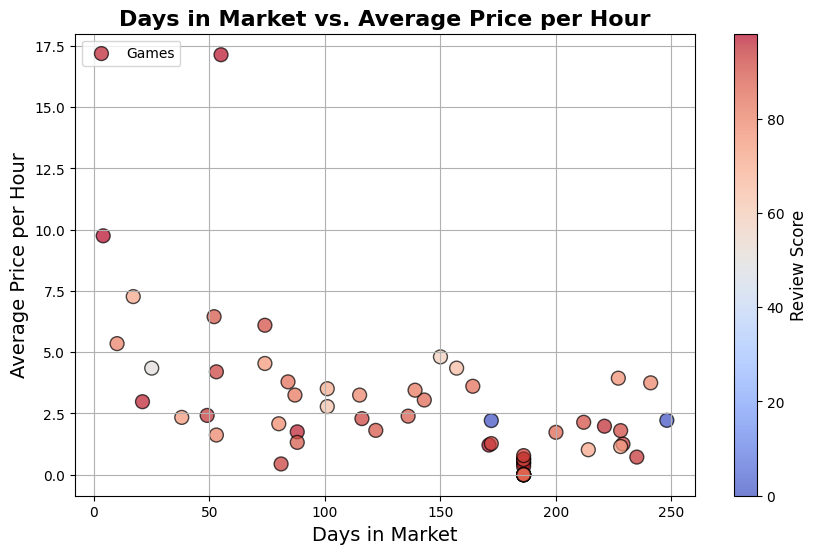

In [14]:
# A scatter plot to show the relationship between the number of days a game has been in the market and its average price per hour of playtime.
#To analyze whether games that have been on the market longer tend to have a different average price per hour, 
# which could indicate changes in pricing strategy over time.

plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(df_10_publisher_games['days_in_market'], df_10_publisher_games['average_price_per_hour'], 
            c=df_10_publisher_games['review_score'], cmap='coolwarm', s=100, alpha=0.7, edgecolor='k')

# Add color bar to indicate review scores
cbar = plt.colorbar()
cbar.set_label('Review Score', fontsize=12)

# Add titles and labels
plt.title('Days in Market vs. Average Price per Hour', fontsize=16, fontweight='bold')
plt.xlabel('Days in Market', fontsize=14)
plt.ylabel('Average Price per Hour', fontsize=14)

# Add legend explaining the scatter plot
plt.legend(['Games'], loc='upper left', fontsize=10)

plt.grid(True)
plt.savefig('../visuals/initial visuals/days_in_market_vs_average_price_per_hour.png')
plt.show()


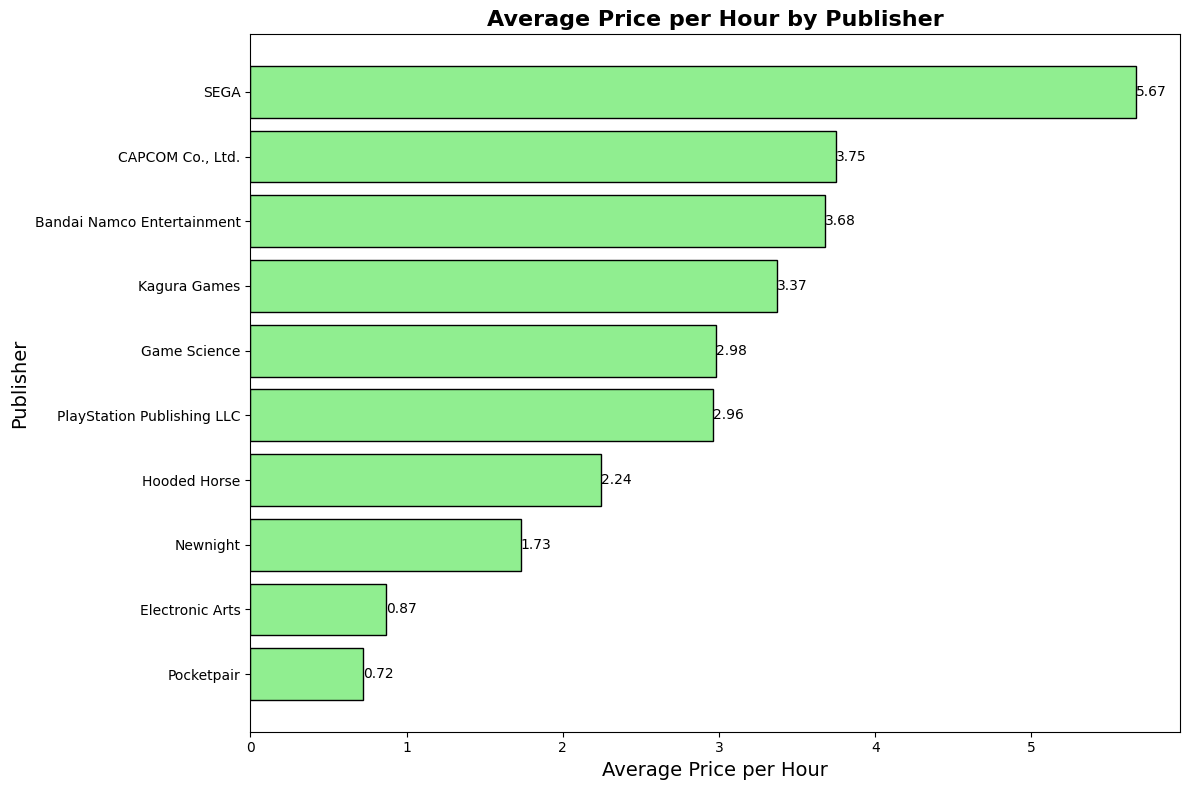

In [15]:
#A bar plot showing the average price per hour for games by the top 10 publishers.
#To compare the pricing strategies of different publishers and identify which publishers tend to charge more or less per hour of playtime.

plt.figure(figsize=(12, 8))

# Calculate average price per hour for each publisher
avg_price_per_hour_by_publisher = df_10_publisher_games.groupby('publisher')['average_price_per_hour'].mean().sort_values()

# Plot bar chart
bars = plt.barh(avg_price_per_hour_by_publisher.index, avg_price_per_hour_by_publisher, color='lightgreen', edgecolor='black')

# Add text labels on bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', va='center', fontsize=10)

# Add titles and labels
plt.title('Average Price per Hour by Publisher', fontsize=16, fontweight='bold')
plt.xlabel('Average Price per Hour', fontsize=14)
plt.ylabel('Publisher', fontsize=14)

plt.tight_layout()
plt.savefig('../visuals/initial visuals/average_price_per_hour_by_publisher.png')
plt.show()


C:\Users\alice\AppData\Local\Temp\ipykernel_16076\3310862494.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10_publisher_games['publisher_class'] = df_10_publisher_games['publisher_class'].apply(lambda x: {'AAA': 'red', 'Indie': 'blue'}.get(x, 'gray'))


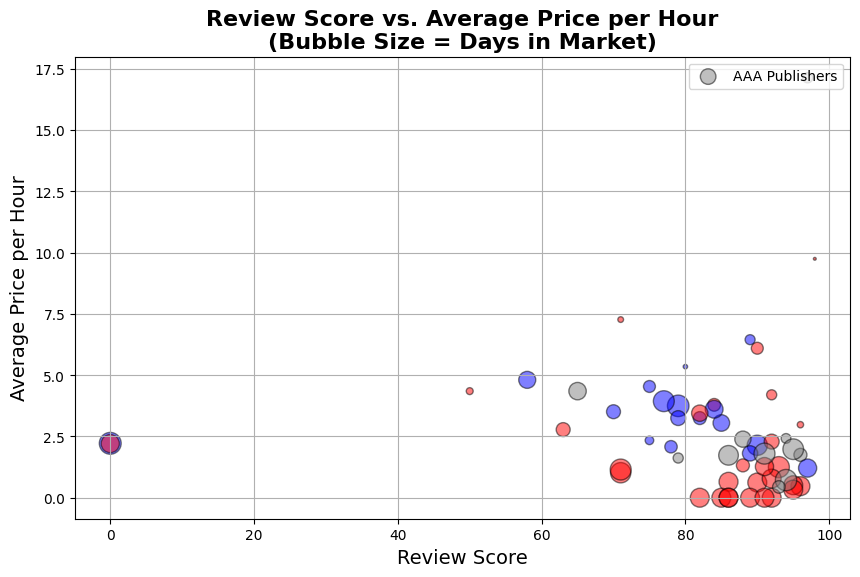

In [16]:
# A bubble plot that shows the relationship between review score and average price per hour, 
# with the size of each bubble representing the number of days the game has been in the market.
#To visualize how review scores and pricing strategies might interact, while also considering the game's age in the market.


# Fill None values in 'publisher_class' with a default color (e.g., 'gray')
df_10_publisher_games['publisher_class'] = df_10_publisher_games['publisher_class'].apply(lambda x: {'AAA': 'red', 'Indie': 'blue'}.get(x, 'gray'))

plt.figure(figsize=(10, 6))

# Bubble plot
plt.scatter(df_10_publisher_games['review_score'], df_10_publisher_games['average_price_per_hour'], 
            s=df_10_publisher_games['days_in_market'],  # Size of the bubbles
            c=df_10_publisher_games['publisher_class'], 
            alpha=0.5, edgecolor='k')

# Add titles and labels
plt.title('Review Score vs. Average Price per Hour\n(Bubble Size = Days in Market)', fontsize=16, fontweight='bold')
plt.xlabel('Review Score', fontsize=14)
plt.ylabel('Average Price per Hour', fontsize=14)

# Add a legend to explain bubble color and size
plt.legend(['AAA Publishers', 'Indie Publishers'], loc='upper right', fontsize=10)

plt.grid(True)

# Save the plot as an image to the visuals - initial visuals folder
plt.savefig('../visuals/initial visuals/review_score_vs_avg_price_per_hour.png')

plt.show()


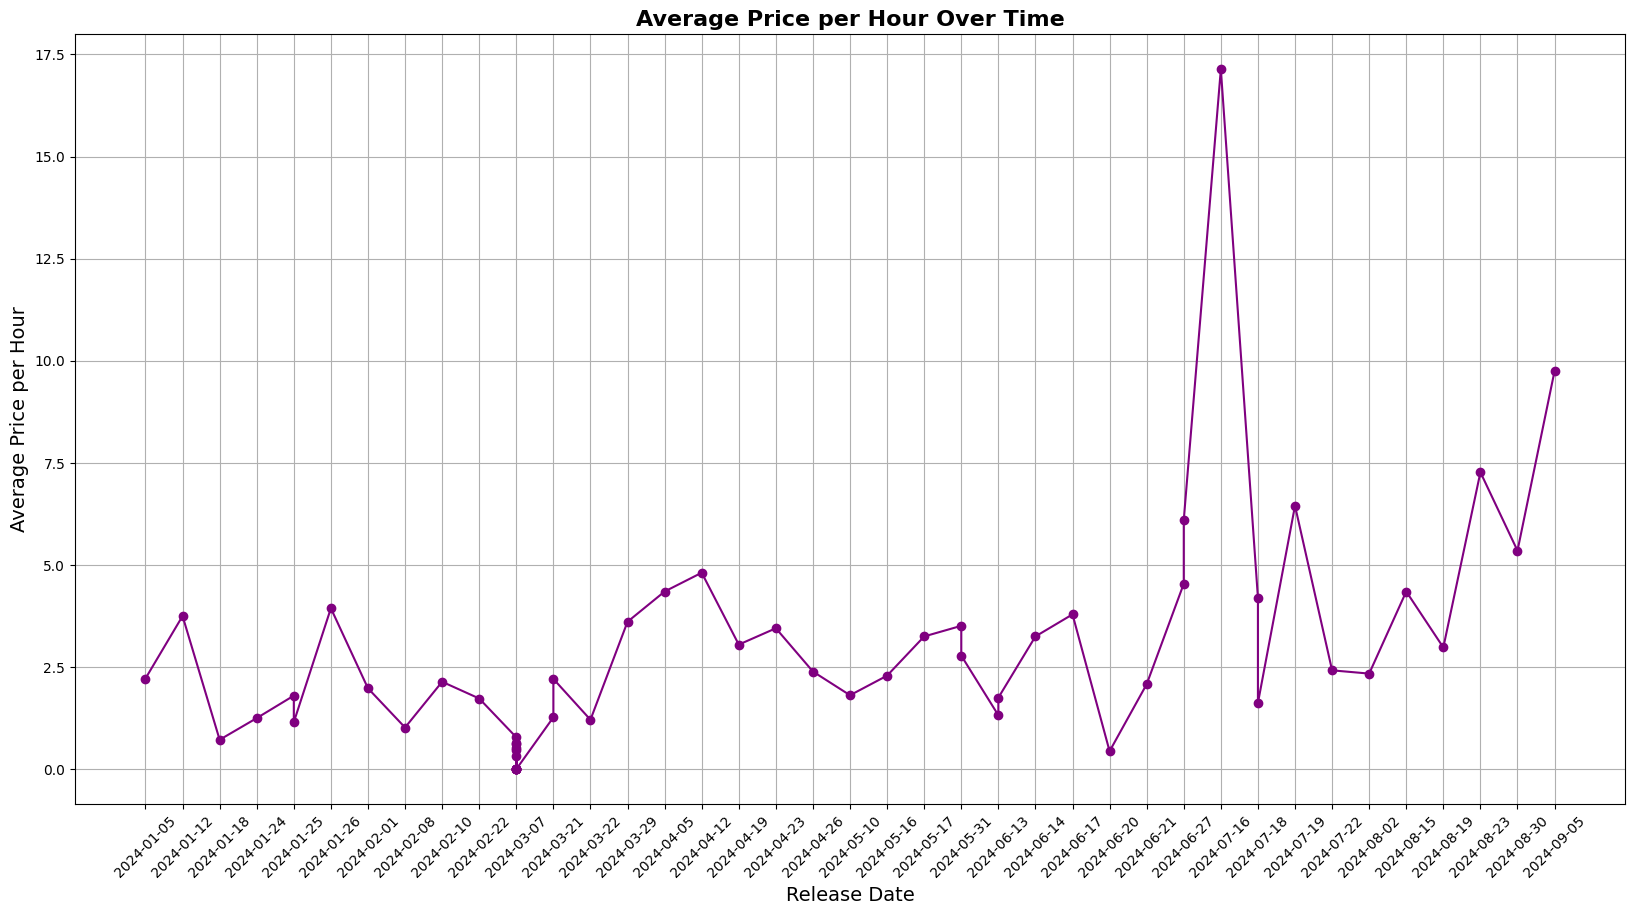

In [17]:
#A line plot to track changes in the average price per hour for games released over time.
#To identify trends in pricing strategy changes based on the release dates of games.


plt.figure(figsize=(20, 10))

# Convert release date to datetime and sort by it
df_10_publisher_games = df_10_publisher_games.sort_values('release_date')

# Calculate average price per hour over time
plt.plot(df_10_publisher_games['release_date'], df_10_publisher_games['average_price_per_hour'], marker='o', linestyle='-', color='purple')

# Add titles and labels
plt.title('Average Price per Hour Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Release Date', fontsize=14)
plt.ylabel('Average Price per Hour', fontsize=14)
plt.xticks(rotation=45)

plt.grid(True)
plt.savefig('../visuals/initial visuals/average_price_per_hour_over_time.png')
plt.show()


C:\Users\alice\AppData\Local\Temp\ipykernel_16076\1726502153.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df_10_publisher_games.pivot_table(index='publisher', columns='review_score_category', values='average_price_per_hour', aggfunc='mean')


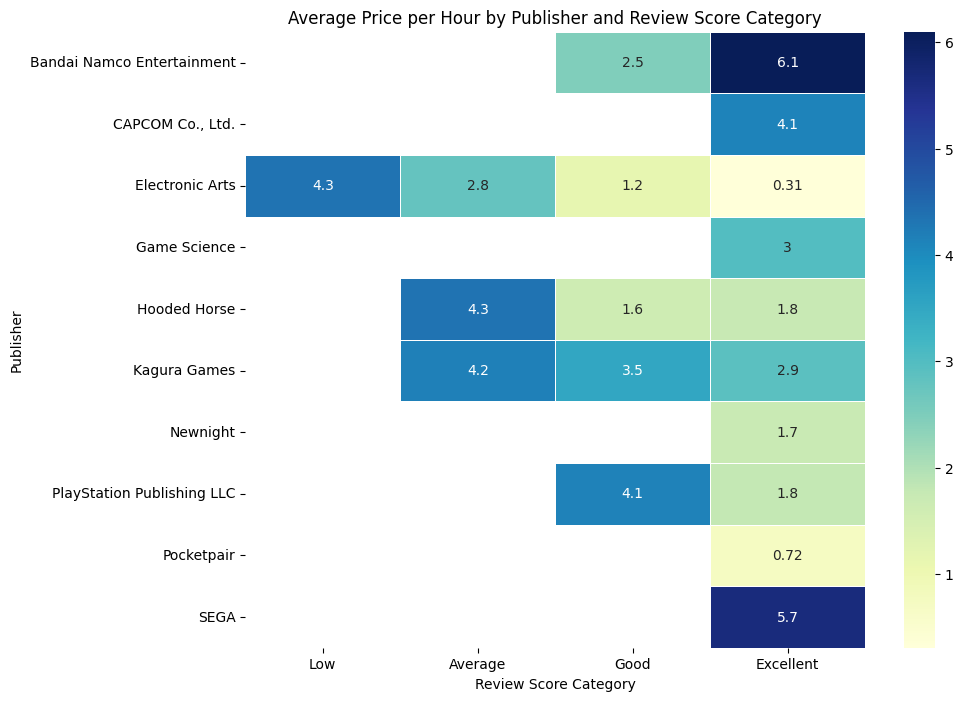

In [18]:
#A heatmap that shows the average price per hour grouped by publisher and review score ranges.
#To understand how pricing varies across different publishers and different quality levels (review scores).

# Create review score categories
df_10_publisher_games['review_score_category'] = pd.cut(df_10_publisher_games['review_score'], bins=[0, 50, 70, 85, 100], labels=['Low', 'Average', 'Good', 'Excellent'])

# Pivot table for heatmap data
heatmap_data = df_10_publisher_games.pivot_table(index='publisher', columns='review_score_category', values='average_price_per_hour', aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', linewidths=.5)
plt.title('Average Price per Hour by Publisher and Review Score Category')
plt.xlabel('Review Score Category')
plt.ylabel('Publisher')
plt.savefig('../visuals/initial visuals/average_price_per_hour_by_publisher_and_review_score.png')
plt.show()


**Lets look for Indie game publishers from here**

In [19]:
# Step 1: Filter Indie Game Publishers
indie_df = df_2[df_2['publisher_class'] == 'Indie'].copy()

# Check the first few rows of the new indie_df DataFrame
indie_df


,game,release_date,copies_sold,price,revenue,avg_playtime,review_score,publisher_class,publisher,developers,steam_id,total_revenue,revenue_percentage,days_in_market,average_price_per_hour
1,EARTH DEFENSE FORCE 6,2024-07-25,159806,59.99,7882151.0,29.7,57,Indie,D3PUBLISHER,SANDLOT,2291060,7945034.0,99.21,46,2.02
2,Sins of a Solar Empire II,2024-08-15,214192,49.99,7815247.0,12.5,88,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment",1575940,7922689.0,98.64,25,4.00
3,Legend of Mortal,2024-06-14,440998,19.99,7756399.0,24.8,76,Indie,"Paras Games,Obb Studio Inc.",Obb Studio Inc.,1859910,7756399.0,100.00,87,0.81
5,Soulmask,2024-05-30,304685,29.99,7540563.0,95.7,79,Indie,Qooland Games,CampFire Studio,2646460,7540563.0,100.00,102,0.31
6,The Universim,2024-01-22,328945,29.99,7534369.0,16.9,81,Indie,Crytivo,Crytivo,352720,9044587.0,83.30,231,1.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,Lust Goddess,2024-02-21,456707,0.00,9695496.0,33.5,48,Indie,BRAWEA LTD,BRAWEA LTD,2808930,9695496.0,100.00,201,0.00
1491,Pacific Drive,2024-02-21,401030,29.99,9517954.0,18.2,0,Indie,Kepler Interactive,Ironwood Studios,1458140,11324934.0,84.04,201,1.65
1495,Infection Free Zone,2024-04-11,452146,24.99,8739530.0,14.5,73,Indie,Games Operators,Jutsu Games,1465460,8739530.0,100.00,151,1.72
1496,Dark and Darker,2024-06-07,2640903,0.00,8706135.0,32.0,74,Indie,IRONMACE,IRONMACE,2016590,8706135.0,100.00,94,0.00


In [20]:
#Filter the top 20 Indie game publishers by total revenue.

# Calculate total revenue for each Indie publisher
indie_revenue = indie_df.groupby('publisher')['revenue'].sum().sort_values(ascending=False).head(20).index

# Filter the original DataFrame for these publishers
top_20_indie_revenue = indie_df[indie_df['publisher'].isin(indie_revenue)].copy()

top_20_indie_revenue.head() 



,game,release_date,copies_sold,price,revenue,avg_playtime,review_score,publisher_class,publisher,developers,steam_id,total_revenue,revenue_percentage,days_in_market,average_price_per_hour
6,The Universim,2024-01-22,328945,29.99,7534369.0,16.9,81,Indie,Crytivo,Crytivo,352720,9044587.0,83.30,231,1.77
13,STAR WARS™: Battlefront Classic Collection,2024-03-13,185054,35.01,6048340.0,4.4,0,Indie,Aspyr,Aspyr,2446550,9751837.0,62.02,180,7.96
46,Tomb Raider I-III Remastered Starring Lara Croft,2024-02-13,125073,29.99,3262820.0,25.6,87,Indie,Aspyr,"Aspyr,Crystal Dynamics",2478970,9751837.0,33.46,209,1.17
109,Tchia,2024-03-21,11684,29.99,212197.0,7.9,0,Indie,Kepler Interactive,Awaceb,1496590,11324934.0,1.87,172,3.80
249,Kādomon: Hyper Auto Battlers,2024-03-25,15364,9.99,126462.0,9.4,69,Indie,Fireshine Games,Dino Rocket,2125540,20800017.0,0.61,168,1.06


In [21]:
#Filter the top 20 Indie game publishers by the best average review scores.

# Calculate the average review score for each Indie publisher
indie_score = indie_df.groupby('publisher')['review_score'].mean().sort_values(ascending=False).head(20).index

# Filter the original DataFrame for these publishers
top_20_indie_score = indie_df[indie_df['publisher'].isin(indie_score)].copy()

top_20_indie_score.head()  



,game,release_date,copies_sold,price,revenue,avg_playtime,review_score,publisher_class,publisher,developers,steam_id,total_revenue,revenue_percentage,days_in_market,average_price_per_hour
101,Angel at Dusk,2024-01-12,20643,14.99,217085.0,10.8,99,Indie,"Henteko Doujin,Sanuk Inc.",Akiragoya,1405500,217085.0,100.0,241,1.39
169,A Tower Full of Cats,2024-05-20,41463,4.99,171352.0,2.7,99,Indie,Devcats,Devcats,2179170,171352.0,100.0,112,1.85
254,Kitsune Tails,2024-08-01,7489,19.99,124094.0,3.1,99,Indie,"Kitsune Games,MidBoss, LLC.",Kitsune Games,1325260,124094.0,100.0,39,6.45
257,DEVIL BLADE REBOOT,2024-05-23,9966,15.99,123743.0,4.5,100,Indie,SHIGATAKE GAMES,SHIGATAKE GAMES,2882440,123743.0,100.0,109,3.55
310,Aero GPX,2024-08-06,6739,19.99,105983.0,4.2,99,Indie,Aaron McDevitt,Aaron McDevitt,2160360,105983.0,100.0,34,4.76


In [22]:
#filter the top 20 Indie game publishers with the most games released, adding additional publishers by review score if needed.

# Calculate the number of games released by each Indie publisher
indie_game_count = indie_df['publisher'].value_counts()

# Select the top publishers by the number of games
top_publishers_by_games = indie_game_count.head(20).index

# If we have less than 20 publishers, fill in the rest by top average score
if len(top_publishers_by_games) < 20:
    # Get additional publishers by highest average score
    additional_publishers = indie_df.groupby('publisher')['review_score'].mean().sort_values(ascending=False).index
    additional_publishers = additional_publishers[~additional_publishers.isin(top_publishers_by_games)].tolist()
    needed_publishers = additional_publishers[:20 - len(top_publishers_by_games)]
    top_publishers_by_games = top_publishers_by_games.tolist() + needed_publishers

# Filter the original DataFrame for these publishers
top_20_indie_pub = indie_df[indie_df['publisher'].isin(top_publishers_by_games)].copy()

top_20_indie_pub.head()


,game,release_date,copies_sold,price,revenue,avg_playtime,review_score,publisher_class,publisher,developers,steam_id,total_revenue,revenue_percentage,days_in_market,average_price_per_hour
16,Winter Memories,2024-01-05,424281,19.99,5478333.0,9.0,0,Indie,Kagura Games,Dojin Otome,2495450,8701350.0,62.96,248,2.22
50,Hookah Haze,2024-07-10,17717,17.99,263733.0,4.8,92,Indie,Aniplex Inc.,ACQUIRE Corp.,2470300,1087427.0,24.25,61,3.75
57,LONESTAR,2024-01-18,36933,9.99,259157.0,20.5,0,Indie,Thermite Games,Math Tide,2056210,790805.0,32.77,235,0.49
59,Revue Starlight El Dorado,2024-08-07,9499,29.99,256387.0,5.4,98,Indie,Bushiroad Inc.,Frontwing,2849960,415727.0,61.67,33,5.55
64,Great Houses of Calderia,2024-05-02,14675,24.99,253627.0,8.1,78,Indie,Firesquid,Resistance Games,1812910,1371080.0,18.50,130,3.09


In [23]:
top_20_indie_pub

,game,release_date,copies_sold,price,revenue,avg_playtime,review_score,publisher_class,publisher,developers,steam_id,total_revenue,revenue_percentage,days_in_market,average_price_per_hour
16,Winter Memories,2024-01-05,424281,19.99,5478333.0,9.0,0,Indie,Kagura Games,Dojin Otome,2495450,8701350.0,62.96,248,2.22
50,Hookah Haze,2024-07-10,17717,17.99,263733.0,4.8,92,Indie,Aniplex Inc.,ACQUIRE Corp.,2470300,1087427.0,24.25,61,3.75
57,LONESTAR,2024-01-18,36933,9.99,259157.0,20.5,0,Indie,Thermite Games,Math Tide,2056210,790805.0,32.77,235,0.49
59,Revue Starlight El Dorado,2024-08-07,9499,29.99,256387.0,5.4,98,Indie,Bushiroad Inc.,Frontwing,2849960,415727.0,61.67,33,5.55
64,Great Houses of Calderia,2024-05-02,14675,24.99,253627.0,8.1,78,Indie,Firesquid,Resistance Games,1812910,1371080.0,18.50,130,3.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,Sex of Thrones 👑,2024-05-25,41711,14.99,388950.0,2.5,77,Indie,Taboo Tales 💘,Taboo Tales 💘,2480200,683298.0,56.92,107,6.00
1351,Mech Engineer,2024-05-21,33261,14.99,386128.0,14.7,76,Indie,MicroProse Software,KiberKreker,1428520,1122389.0,34.40,111,1.02
1371,NUKITASHI 2,2024-02-15,22206,24.99,348104.0,16.6,0,Indie,Shiravune,Qruppo,2614070,811767.0,42.88,207,1.51
1393,Ultros,2024-02-13,18046,24.99,329960.0,9.5,84,Indie,Kepler Interactive,Hadoque,2386310,11324934.0,2.91,209,2.63


In [24]:
df_2.head()

,game,release_date,copies_sold,price,revenue,avg_playtime,review_score,publisher_class,publisher,developers,steam_id,total_revenue,revenue_percentage,days_in_market,average_price_per_hour
0,WWE 2K24,2024-03-07,165301,99.99,8055097.0,42.4,71,AAA,2K,Visual Concepts,2315690,18878021.0,42.67,186,2.36
1,EARTH DEFENSE FORCE 6,2024-07-25,159806,59.99,7882151.0,29.7,57,Indie,D3PUBLISHER,SANDLOT,2291060,7945034.0,99.21,46,2.02
2,Sins of a Solar Empire II,2024-08-15,214192,49.99,7815247.0,12.5,88,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment",1575940,7922689.0,98.64,25,4.00
3,Legend of Mortal,2024-06-14,440998,19.99,7756399.0,24.8,76,Indie,"Paras Games,Obb Studio Inc.",Obb Studio Inc.,1859910,7756399.0,100.00,87,0.81
4,Shin Megami Tensei V: Vengeance,2024-06-13,141306,59.99,7629252.0,34.3,96,AA,SEGA,ATLUS,1875830,63528353.0,12.01,88,1.75


**I recently discovered interactive plotting**

**Gonna plot with interactive graphs and see results**

In [25]:
#Create an interactive scatter plot
fig = px.scatter(df_2, 
                 x='days_in_market', 
                 y='average_price_per_hour', 
                 hover_data=['game', 'revenue', 'review_score'],
                 title='Days in Market vs Average Price per Hour for Steam Games 2024')

# Show the plot
fig.write_html('../visuals/initial visuals/interactive_scatter_plot.html')
fig.show()


In [26]:
top_20_indie_revenue.head()

,game,release_date,copies_sold,price,revenue,avg_playtime,review_score,publisher_class,publisher,developers,steam_id,total_revenue,revenue_percentage,days_in_market,average_price_per_hour
6,The Universim,2024-01-22,328945,29.99,7534369.0,16.9,81,Indie,Crytivo,Crytivo,352720,9044587.0,83.30,231,1.77
13,STAR WARS™: Battlefront Classic Collection,2024-03-13,185054,35.01,6048340.0,4.4,0,Indie,Aspyr,Aspyr,2446550,9751837.0,62.02,180,7.96
46,Tomb Raider I-III Remastered Starring Lara Croft,2024-02-13,125073,29.99,3262820.0,25.6,87,Indie,Aspyr,"Aspyr,Crystal Dynamics",2478970,9751837.0,33.46,209,1.17
109,Tchia,2024-03-21,11684,29.99,212197.0,7.9,0,Indie,Kepler Interactive,Awaceb,1496590,11324934.0,1.87,172,3.80
249,Kādomon: Hyper Auto Battlers,2024-03-25,15364,9.99,126462.0,9.4,69,Indie,Fireshine Games,Dino Rocket,2125540,20800017.0,0.61,168,1.06


In [27]:
# Description: Creating an interactive bar plot using Plotly to visualize the revenue of the top 20 indie games.
# The bar plot displays game names on the x-axis and their corresponding revenue on the y-axis. 
# Revenue values are shown on top of each bar with a 45-degree angle and increased font size for better readability.
# The plot dimensions are set to be larger for enhanced visibility.

# Prepare data
games = top_20_indie_revenue['game']
revenue = top_20_indie_revenue['revenue']

# Create bar plot
fig = go.Figure(data=[go.Bar(
    x=games,
    y=revenue,
    marker_color='green'
)])

# Add revenue text on top of bars with 45-degree angle and larger font size
fig.update_traces(
    text=revenue,  # Display revenue values
    textposition='outside',  # Place text outside the bars
    textangle=45,  # Rotate text by 45 degrees
    textfont_size=45  # Increase font size for text labels
)

# Update layout
fig.update_layout(
    title='Revenue of Top 20 Indie Games',
    xaxis_title='Games',
    yaxis_title='Revenue',
    xaxis_tickangle=-45,  # Rotate game names for better readability
    xaxis_tickfont_size=10,  # Adjust font size if needed
    yaxis=dict(
        range=[0, 50000000]  # Set y-axis range from 0 to 50 million
    ),
    width=1800,  # Increase plot width
    height=900   # Increase plot height
)

# Save the plot as HTML
fig.write_html('../visuals/initial visuals/bar_plot_indie_revenue.html')

# Show the plot
fig.show()


In [28]:
#Display hierarchical data as nested rectangles where size and color represent different metrics.
#Show revenue with game names as labels and average playtime as a secondary metric.
#Use: Show revenue with game names as labels and average playtime as a secondary metric. Threemap

# Prepare data
df = top_20_indie_revenue.copy()
df['playtime_revenue_ratio'] = df['avg_playtime'] / df['revenue']

# Create treemap
fig = px.treemap(df, 
                 path=['game'], 
                 values='revenue',
                 color='playtime_revenue_ratio',
                 color_continuous_scale='Blues',
                 labels={'revenue': 'Revenue', 'playtime_revenue_ratio': 'Playtime/Revenue Ratio'},
                 title='Treemap of Revenue and Playtime Ratio by Game')

# Update layout
fig.update_layout(
    width=1200,
    height=900,
    margin=dict(l=100, r=100, t=100, b=150)
)

# Save the plot as HTML
fig.write_html('../visuals/initial visuals/treemap_revenue_playtime.html')

# Show the plot
fig.show()


In [29]:
# This code creates an interactive bar plot to compare average playtime and revenue of the top 20 indie games.
# Each bar represents the average playtime, and the revenue values are displayed on top of each bar.



# Prepare data
avg_playtime = top_20_indie_revenue['avg_playtime']
revenue = top_20_indie_revenue['revenue']
games = top_20_indie_revenue['game']

# Create bar plot
fig = go.Figure(data=[go.Bar(
    x=games,
    y=avg_playtime,
    text=avg_playtime,  # Display average playtime values
    textposition='outside',  # Place text outside the bars
    textangle=45,  # Rotate text by 45 degrees
    textfont_size=20,  # Increase font size for text labels
    marker_color='red'  # Set a vivid color for the bars
)])

# Update layout
fig.update_layout(
    title='Average Playtime of Top 20 Indie Games',
    xaxis_title='Games',
    yaxis_title='Average Playtime (hours)',
    xaxis_tickangle=-45,  # Rotate game names for better readability
    xaxis_tickfont_size=10,  # Adjust font size if needed
    yaxis=dict(
        range=[0, max(avg_playtime) + 5]  # Adjust y-axis range to fit all values
    ),
    width=1200,  # Increase plot width
    height=1200   # Increase plot height
)

# Save the plot as HTML
fig.write_html('../visuals/initial visuals/bar_plot_avg_playtime.html')

# Show the plot
fig.show()


In [30]:
# This code creates an interactive scatter plot to compare revenue and review scores of the top 20 indie games.
# Each point represents a game, with color indicating the revenue and size indicating the review score.



# Prepare data
review_score = top_20_indie_revenue['review_score']

# Create scatter plot
fig = go.Figure(data=[go.Scatter(
    x=revenue,
    y=review_score,
    mode='markers+text',
    text=games,
    textposition='top center',
    marker=dict(
        size=review_score,  # Size of markers based on review score
        color=revenue,  # Color of markers based on revenue
        colorscale='Viridis',  # Use a vivid color scale
        colorbar=dict(title='Revenue')  # Color bar for revenue
    )
)])

# Update layout
fig.update_layout(
    title='Revenue vs Review Score of Top 20 Indie Games',
    xaxis_title='Revenue',
    yaxis_title='Review Score',
    width=1200,  # Increase plot width
    height=900   # Increase plot height
)

# Save the plot as HTML
fig.write_html('../visuals/initial visuals/scatter_plot_revenue_review_score.html')

# Show the plot
fig.show()


In [31]:
# This code creates an interactive bar plot to compare the review score and average playtime of the top 20 indie games.
# Each bar represents a game, with the length of the bar showing average playtime and the text on top indicating the review score.



# Prepare data
games = top_20_indie_score['game']
review_score = top_20_indie_score['review_score']
avg_playtime = top_20_indie_score['avg_playtime']

# Create bar plot
fig = go.Figure(data=[go.Bar(
    x=games,
    y=avg_playtime,
    text=review_score,
    textposition='outside',
    textangle=45,
    textfont_size=25,
    marker_color='royalblue'
)])

# Update layout
fig.update_layout(
    title='Review Score vs. Average Playtime of Top 20 Indie Games',
    xaxis_title='Games',
    yaxis_title='Average Playtime (hours)',
    xaxis_tickangle=-45,
    xaxis_tickfont_size=15,
    yaxis=dict(
        title='Average Playtime (hours)',
        titlefont_size=25,
        tickfont_size=20
    ),
    width=1200,
    height=900
)

# Save the plot as HTML
fig.write_html('../visuals/initial visuals/bar_plot_review_score_avg_playtime.html')

# Show the plot
fig.show()


In [32]:
# This code creates an interactive scatter plot to compare the review score and price of the top 20 indie games.
# Each point represents a game, with size indicating review score and color indicating price.




# Prepare data
price = top_20_indie_score['price']
review_score = top_20_indie_score['review_score']
games = top_20_indie_score['game']

# Create scatter plot
fig = go.Figure(data=[go.Scatter(
    x=price,
    y=review_score,
    mode='markers+text',
    text=games,  # Add game names as text on the plot
    textposition='top center',  # Position text on top of the bubbles
    marker=dict(
        size=review_score,
        color=price,
        colorscale='Blues',
        colorbar=dict(title='Price')
    )
)])

# Update layout
fig.update_layout(
    title='Review Score vs Price of Top 20 Indie Games',
    xaxis_title='Price',
    yaxis_title='Review Score',
    width=1200,
    height=900
)

# Save the plot as HTML
fig.write_html('../visuals/initial visuals/scatter_plot_review_score_price.html')

# Show the plot
fig.show()


In [33]:
top_20_indie_pub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, 16 to 1491
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game                    130 non-null    object 
 1   release_date            130 non-null    object 
 2   copies_sold             130 non-null    int64  
 3   price                   130 non-null    float64
 4   revenue                 130 non-null    float64
 5   avg_playtime            130 non-null    float64
 6   review_score            130 non-null    int64  
 7   publisher_class         130 non-null    object 
 8   publisher               130 non-null    object 
 9   developers              130 non-null    object 
 10  steam_id                130 non-null    int64  
 11  total_revenue           130 non-null    float64
 12  revenue_percentage      130 non-null    float64
 13  days_in_market          130 non-null    int64  
 14  average_price_per_hour  130 non-null    float

In [34]:
# This code creates an interactive scatter plot to visualize clustered games based on revenue and average playtime.
# Games are grouped into clusters to help identify patterns.

import plotly.graph_objects as go
from sklearn.cluster import KMeans

# Prepare data
revenue = top_20_indie_pub['revenue']
avg_playtime = top_20_indie_pub['avg_playtime']

# Perform clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(top_20_indie_pub[['revenue', 'avg_playtime']])
clusters = kmeans.labels_

# Create scatter plot
fig = go.Figure(data=[go.Scatter(
    x=revenue,
    y=avg_playtime,
    mode='markers',
    marker=dict(
        size=10,
        color=clusters,  # Color points by cluster
        colorscale='Viridis',
        colorbar=dict(title='Cluster')
    ),
    text=top_20_indie_pub['game'],  # Show game names on hover
    textposition='top center'
)])

# Update layout
fig.update_layout(
    title='Clustered Games: Revenue vs Average Playtime',
    xaxis_title='Revenue',
    yaxis_title='Average Playtime',
    width=1200,
    height=750
)

# Save the plot as HTML
fig.write_html('../visuals/initial visuals/clustered_scatter_plot_revenue_playtime.html')

# Show the plot
fig.show()


In [35]:
# This code creates an interactive treemap to visualize revenue distribution among games by publisher class.


# Prepare data
df = top_20_indie_pub.copy()

# Create treemap
fig = px.treemap(df, 
                 path=['publisher_class', 'game'], 
                 values='revenue',
                 color='revenue',
                 color_continuous_scale='Blues',
                 title='Revenue Distribution by Publisher Class')

# Update layout
fig.update_layout(
    width=1800,
    height=900
)

# Save the plot as HTML
fig.write_html('../visuals/initial visuals/treemap_revenue_publisher_class.html')

# Show the plot
fig.show()


In [36]:
# This code creates an interactive heatmap to visualize correlations between different numerical features of games.



# Prepare data
df = top_20_indie_pub[['price', 'revenue', 'avg_playtime', 'review_score']]

# Create heatmap
fig = px.imshow(df.corr(), 
                text_auto=True, 
                color_continuous_scale='Viridis',
                title='Correlation Heatmap of Game Features')

# Update layout
fig.update_layout(
    width=1200,
    height=750
)

# Save the plot as HTML
fig.write_html('../visuals/initial visuals/heatmap_feature_correlation.html')

# Show the plot
fig.show()


In [38]:
#A bar plot to visualize the total revenue generated by each game under a specific publisher. 
# This helps in comparing which games contribute the most to the publisher's overall revenue.

# Group by publisher and create a plot for each publisher
for publisher, data in top_20_indie_pub.groupby('publisher'):
    fig = go.Figure(data=[go.Bar(
        x=data['game'],
        y=data['revenue'],
        marker_color='orange'
    )])

    # Update layout
    fig.update_layout(
        title=f'Total Revenue per Game for {publisher}',
        xaxis_title='Games',
        yaxis_title='Total Revenue',
        xaxis_tickangle=-45,
        width=1200,
        height=800
    )

    # Save and show plot
    fig.write_html(f'../visuals/initial visuals/bar_plot_revenue_{publisher}.html')
    fig.show()


In [41]:
# A treemap to show the revenue distribution among games for each publisher. 
# The size of each rectangle represents the revenue of each game, providing a quick overview of the most successful titles.

for publisher, data in top_20_indie_pub.groupby('publisher'):
    fig = px.treemap(
        data,
        path=['publisher', 'game'],
        values='revenue',
        color='revenue',
        color_continuous_scale='Mint'
    )

    # Update layout
    fig.update_layout(
        title=f'Revenue Distribution for {publisher}',
        width=1200,
        height=800
    )

    # Save and show plot
    fig.write_html(f'../visuals/initial visuals/treemap_revenue_{publisher}.html')
    fig.show()


**Now we are focusing for AA game developers**

In [43]:
df_2.head()

,game,release_date,copies_sold,price,revenue,avg_playtime,review_score,publisher_class,publisher,developers,steam_id,total_revenue,revenue_percentage,days_in_market,average_price_per_hour
0,WWE 2K24,2024-03-07,165301,99.99,8055097.0,42.4,71,AAA,2K,Visual Concepts,2315690,18878021.0,42.67,186,2.36
1,EARTH DEFENSE FORCE 6,2024-07-25,159806,59.99,7882151.0,29.7,57,Indie,D3PUBLISHER,SANDLOT,2291060,7945034.0,99.21,46,2.02
2,Sins of a Solar Empire II,2024-08-15,214192,49.99,7815247.0,12.5,88,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment",1575940,7922689.0,98.64,25,4.00
3,Legend of Mortal,2024-06-14,440998,19.99,7756399.0,24.8,76,Indie,"Paras Games,Obb Studio Inc.",Obb Studio Inc.,1859910,7756399.0,100.00,87,0.81
4,Shin Megami Tensei V: Vengeance,2024-06-13,141306,59.99,7629252.0,34.3,96,AA,SEGA,ATLUS,1875830,63528353.0,12.01,88,1.75


In [49]:
#top_20_AA_revenue: This dataframe will include the top 20 AA publishers by total revenue, along with all the original columns.
#top_20_AA_score: This dataframe will include the top 20 AA publishers with the best average review scores, along with all the original columns.
#top_20_AA_pub: This dataframe will include the top 20 AA publishers by the number of games released. If there aren't enough publishers, 
# it will add the next most highly scored publishers, while retaining all the original columns.


# Filter for AA games
aa_games = df_2[df_2['publisher_class'] == 'AA']

# Step 1: Create top_20_AA_revenue dataframe
top_20_AA_revenue_publishers = (
    aa_games.groupby('publisher')['revenue']
    .sum()
    .reset_index()
    .sort_values(by='revenue', ascending=False)
    .head(20)['publisher']
)

top_20_AA_revenue = aa_games[aa_games['publisher'].isin(top_20_AA_revenue_publishers)]

# Step 2: Create top_20_AA_score dataframe
top_20_AA_score_publishers = (
    aa_games.groupby('publisher')['review_score']
    .mean()
    .reset_index()
    .sort_values(by='review_score', ascending=False)
    .head(20)['publisher']
)

top_20_AA_score = aa_games[aa_games['publisher'].isin(top_20_AA_score_publishers)]

# Step 3: Create top_20_AA_pub dataframe
aa_publisher_game_count = (
    aa_games.groupby('publisher')
    .size()
    .reset_index(name='game_count')
    .sort_values(by='game_count', ascending=False)
)

# If less than 20 publishers, add more by review score
if len(aa_publisher_game_count) < 20:
    additional_publishers = (
        aa_games.groupby('publisher')['review_score']
        .mean()
        .reset_index()
        .sort_values(by='review_score', ascending=False)
        .loc[~aa_games['publisher'].isin(aa_publisher_game_count['publisher'])]
    )
    top_20_AA_pub_publishers = pd.concat([aa_publisher_game_count, additional_publishers]).head(20)['publisher']
else:
    top_20_AA_pub_publishers = aa_publisher_game_count.head(20)['publisher']

top_20_AA_pub = aa_games[aa_games['publisher'].isin(top_20_AA_pub_publishers)]




In [46]:
top_20_AA_revenue.head()

,game,release_date,copies_sold,price,revenue,avg_playtime,review_score,publisher_class,publisher,developers,steam_id,total_revenue,revenue_percentage,days_in_market,average_price_per_hour
4,Shin Megami Tensei V: Vengeance,2024-06-13,141306,59.99,7629252.0,34.3,96,AA,SEGA,ATLUS,1875830,63528353.0,12.01,88,1.75
9,Empires of the Undergrowth,2024-06-07,408292,29.99,6950952.0,38.6,95,AA,"Hooded Horse,Slug Disco",Slug Disco,463530,6950952.0,100.00,94,0.78
10,KINGDOM HEARTS -HD 1.5+2.5 ReMIX-,2024-06-13,212325,49.99,6828446.0,30.3,0,AA,Square Enix,Square Enix,2552430,12662055.0,53.93,88,1.65
33,Norland,2024-07-18,170621,29.99,3991591.0,18.5,79,AA,Hooded Horse,Long Jaunt,1857090,78487195.0,5.09,53,1.62
45,Midnight Ghost Hunt,2024-03-21,371470,19.99,3272209.0,11.9,78,AA,Coffee Stain Publishing,Vaulted Sky Games,915810,13947324.0,23.46,172,1.68


In [47]:
top_20_AA_score.head()

,game,release_date,copies_sold,price,revenue,avg_playtime,review_score,publisher_class,publisher,developers,steam_id,total_revenue,revenue_percentage,days_in_market,average_price_per_hour
4,Shin Megami Tensei V: Vengeance,2024-06-13,141306,59.99,7629252.0,34.3,96,AA,SEGA,ATLUS,1875830,63528353.0,12.01,88,1.75
9,Empires of the Undergrowth,2024-06-07,408292,29.99,6950952.0,38.6,95,AA,"Hooded Horse,Slug Disco",Slug Disco,463530,6950952.0,100.00,94,0.78
33,Norland,2024-07-18,170621,29.99,3991591.0,18.5,79,AA,Hooded Horse,Long Jaunt,1857090,78487195.0,5.09,53,1.62
45,Midnight Ghost Hunt,2024-03-21,371470,19.99,3272209.0,11.9,78,AA,Coffee Stain Publishing,Vaulted Sky Games,915810,13947324.0,23.46,172,1.68
267,Zet Zillions,2024-05-23,14513,9.99,118127.0,11.0,89,AA,Raw Fury,OTA IMON Studios,2229560,2959687.0,3.99,109,0.91


In [48]:
top_20_AA_pub.head()

,game,release_date,copies_sold,price,revenue,avg_playtime,review_score,publisher_class,publisher,developers,steam_id,total_revenue,revenue_percentage,days_in_market,average_price_per_hour
4,Shin Megami Tensei V: Vengeance,2024-06-13,141306,59.99,7629252.0,34.3,96,AA,SEGA,ATLUS,1875830,63528353.0,12.01,88,1.75
10,KINGDOM HEARTS -HD 1.5+2.5 ReMIX-,2024-06-13,212325,49.99,6828446.0,30.3,0,AA,Square Enix,Square Enix,2552430,12662055.0,53.93,88,1.65
33,Norland,2024-07-18,170621,29.99,3991591.0,18.5,79,AA,Hooded Horse,Long Jaunt,1857090,78487195.0,5.09,53,1.62
34,Eiyuden Chronicle: Hundred Heroes,2024-04-23,91925,49.99,3953243.0,26.2,0,AA,505 Games,Rabbit & Bear Studios,1658280,6109093.0,64.71,139,1.91
62,Brothers: A Tale of Two Sons Remake,2024-02-28,21858,19.99,255441.0,2.4,68,AA,505 Games,Avantgarden SRL,2153350,6109093.0,4.18,194,8.33
